In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# add the src folder to the path
import sys
sys.path.append('../')

from src.search import grid_search_cv
from src.utils import load_cup
from src.network import Network
from src.activations import ReLU, Tanh, Sigmoid
from src.losses import MeanSquaredError
from src.metrics import BinaryAccuracy,  MeanEuclideanError
from src.callbacks import EarlyStopping

from sklearn.metrics import accuracy_score
x_train, x_val, y_train, y_val, scaler = load_cup(validation=True, scale_outputs=True)
y_train.shape

(895, 2, 1)

In [3]:
model = Network(9)
model.add_layer(2, ReLU())
model.add_layer(2, Sigmoid())

stats = model.train(
    eta=10e-3, 
    nesterov=0.8, 
    train=(x_train, y_train), 
    validation=(x_val, y_val), 
    metric=MeanEuclideanError(), 
    loss=MeanSquaredError(),
    epochs=1000,
    callbacks=[EarlyStopping(50)]
)

Training:  91%|█████████ | 912/1000[, loss=0.0056, val_loss=0.006, val_acc=0.0906]   

Early stopping


<AxesSubplot: >

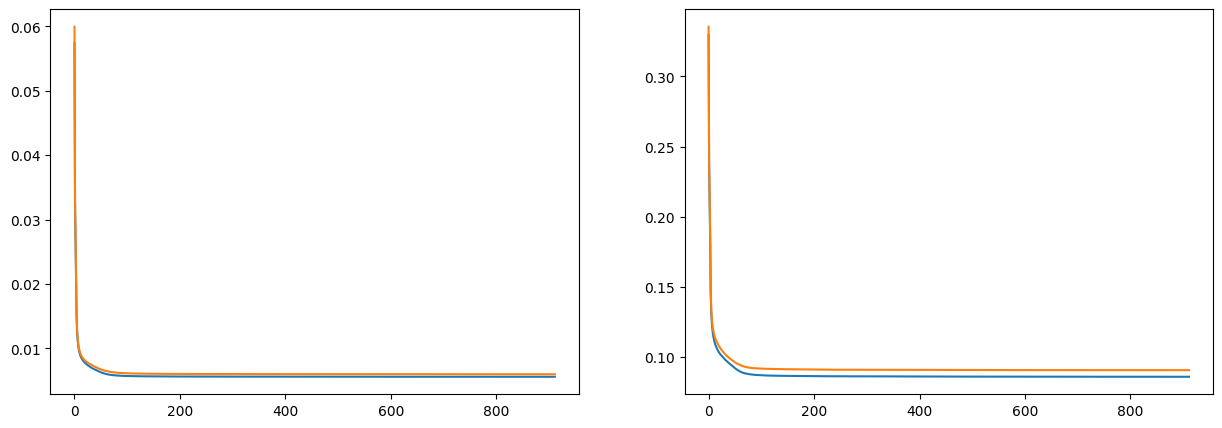

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(stats['train_loss'], ax=axs[0])
sns.lineplot(stats['val_loss'], ax=axs[0])
sns.lineplot(stats['train_acc'], ax=axs[1])
sns.lineplot(stats['val_acc'], ax=axs[1])

In [12]:
y_pred = model.multiple_outputs(x_val)

y_pred_new = scaler.inverse_transform(y_pred.reshape((y_pred.shape[0], y_pred.shape[1]))).reshape(y_pred.shape)
y_val_new = scaler.inverse_transform(y_val.reshape((y_val.shape[0], y_val.shape[1]))).reshape(y_val.shape)

metric = MeanEuclideanError()
metric(y_pred_new, y_val_new)

8.021723876660042

## Second try, with two hidden layers, no regularizer


#### 5-5 architecture

In [13]:
model = Network(9)
model.add_layer(5, ReLU())
model.add_layer(5, ReLU())
model.add_layer(2, Sigmoid())

stats = model.train(
    eta=10e-3, 
    nesterov=0.8, 
    train=(x_train, y_train), 
    validation=(x_val, y_val), 
    metric=MeanEuclideanError(), 
    loss=MeanSquaredError(),
    epochs=1000,
    callbacks=[EarlyStopping(50)]
)

Training:  20%|██        | 201/1000[, loss=0.00472, val_loss=0.00545, val_acc=0.0822]

Early stopping


In [16]:
y_pred = model.multiple_outputs(x_val)

y_pred_new = scaler.inverse_transform(y_pred.reshape((y_pred.shape[0], y_pred.shape[1]))).reshape(y_pred.shape)
y_val_new = scaler.inverse_transform(y_val.reshape((y_val.shape[0], y_val.shape[1]))).reshape(y_val.shape)

metric = MeanEuclideanError()
print("MEE (real scale):", metric(y_pred_new, y_val_new))

MEE (real scale): 1.648682457659821


#### 10-5 architecture

In [19]:
model = Network(9)
model.add_layer(10, ReLU())
model.add_layer(5, ReLU())
model.add_layer(2, Sigmoid())

stats = model.train(
    eta=10e-3, 
    nesterov=0.8, 
    train=(x_train, y_train), 
    validation=(x_val, y_val), 
    metric=MeanEuclideanError(), 
    loss=MeanSquaredError(),
    epochs=1000,b
    callbacks=[EarlyStopping(50)]
)

Training:  16%|█▌        | 161/1000[, loss=0.00444, val_loss=0.00511, val_acc=0.0774]

Early stopping


In [20]:
y_pred = model.multiple_outputs(x_val)

y_pred_new = scaler.inverse_transform(y_pred.reshape((y_pred.shape[0], y_pred.shape[1]))).reshape(y_pred.shape)
y_val_new = scaler.inverse_transform(y_val.reshape((y_val.shape[0], y_val.shape[1]))).reshape(y_val.shape)

metric = MeanEuclideanError()
print("MEE (real scale):", metric(y_pred_new, y_val_new))

MEE (real scale): 1.555956659682677


<AxesSubplot: >

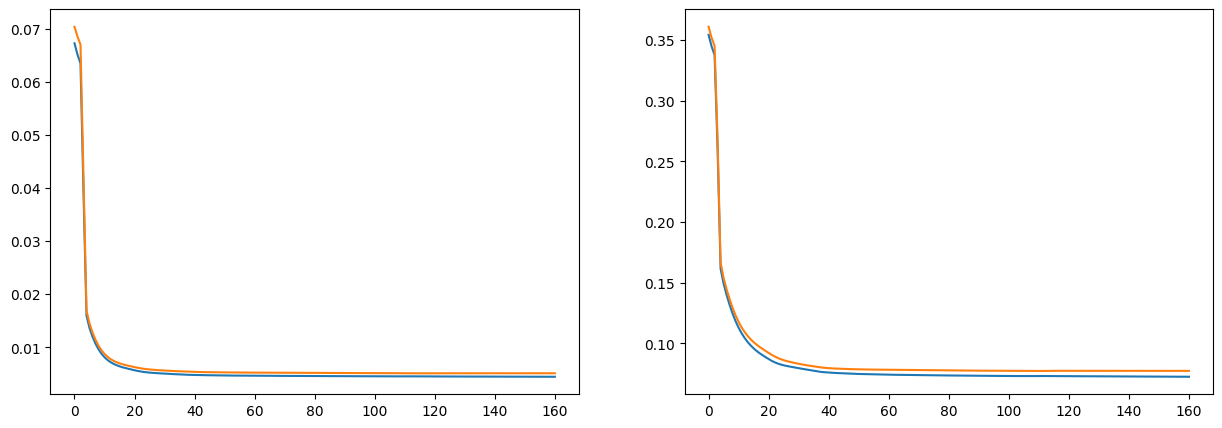

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(stats['train_loss'], ax=axs[0])
sns.lineplot(stats['val_loss'], ax=axs[0])
sns.lineplot(stats['train_acc'], ax=axs[1])
sns.lineplot(stats['val_acc'], ax=axs[1])

#### 8-8 architecture

In [3]:
model = Network(9)
model.add_layer(8, ReLU())
model.add_layer(8, ReLU())
model.add_layer(2, Sigmoid())

stats = model.train(
    eta=10e-3, 
    nesterov=0.8, 
    train=(x_train, y_train), 
    validation=(x_val, y_val), 
    metric=MeanEuclideanError(), 
    loss=MeanSquaredError(),
    epochs=1000,
    callbacks=[EarlyStopping(50)]
)

Training:  38%|███▊      | 382/1000[, loss=0.00413, val_loss=0.00488, val_acc=0.0759]

Early stopping


<AxesSubplot: >

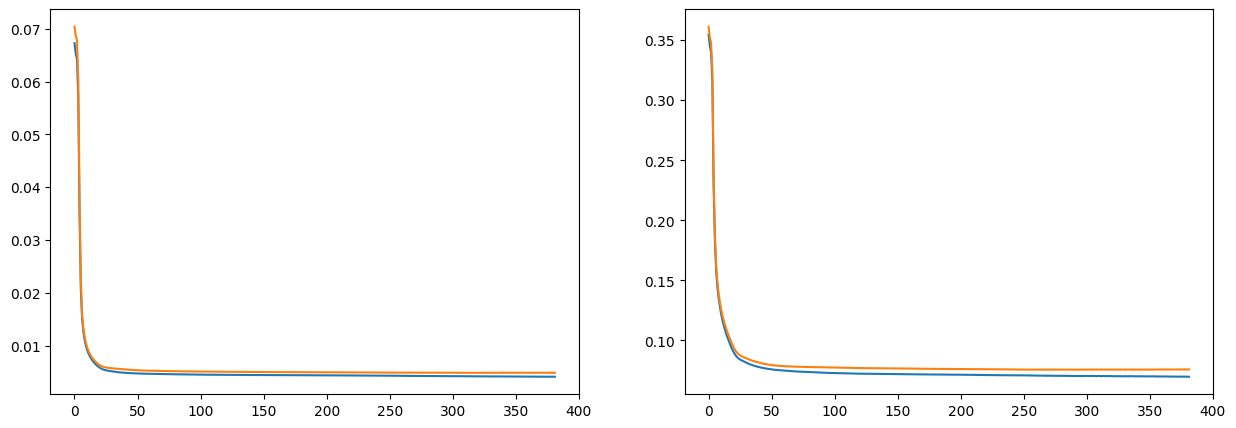

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(stats['train_loss'], ax=axs[0])
sns.lineplot(stats['val_loss'], ax=axs[0])
sns.lineplot(stats['train_acc'], ax=axs[1])
sns.lineplot(stats['val_acc'], ax=axs[1])

In [5]:
y_pred = model.multiple_outputs(x_val)

y_pred_new = scaler.inverse_transform(y_pred.reshape((y_pred.shape[0], y_pred.shape[1]))).reshape(y_pred.shape)
y_val_new = scaler.inverse_transform(y_val.reshape((y_val.shape[0], y_val.shape[1]))).reshape(y_val.shape)

metric = MeanEuclideanError()
print("MEE (real scale):", metric(y_pred_new, y_val_new))

MEE (real scale): 1.5158403835967351


#### 16-8 architecture

Training:  34%|███▎      | 337/1000[, loss=0.00392, val_loss=0.00478, val_acc=0.0761]

Early stopping
MEE (real scale): 1.5196345372283637



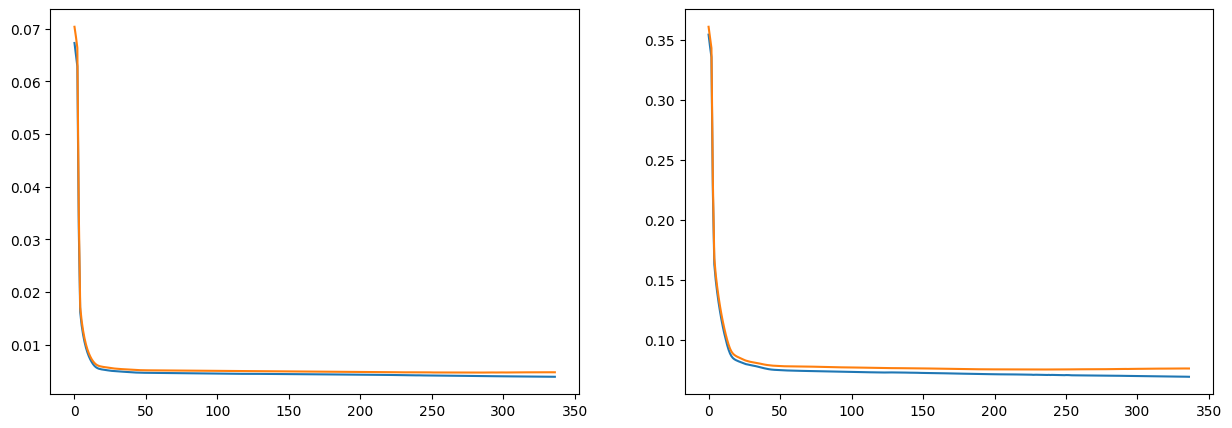

In [2]:
model = Network(9)
model.add_layer(16, ReLU())
model.add_layer(8, ReLU())
model.add_layer(2, Sigmoid())

stats = model.train(
    eta=10e-3, 
    nesterov=0.8, 
    train=(x_train, y_train), 
    validation=(x_val, y_val), 
    metric=MeanEuclideanError(), 
    loss=MeanSquaredError(),
    epochs=1000,
    callbacks=[EarlyStopping(50)]
)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(stats['train_loss'], ax=axs[0])
sns.lineplot(stats['val_loss'], ax=axs[0])
sns.lineplot(stats['train_acc'], ax=axs[1])
sns.lineplot(stats['val_acc'], ax=axs[1])

y_pred = model.multiple_outputs(x_val)

y_pred_new = scaler.inverse_transform(y_pred.reshape((y_pred.shape[0], y_pred.shape[1]))).reshape(y_pred.shape)
y_val_new = scaler.inverse_transform(y_val.reshape((y_val.shape[0], y_val.shape[1]))).reshape(y_val.shape)

metric = MeanEuclideanError()
print("MEE (real scale):", metric(y_pred_new, y_val_new))
print()

#### maybe add regularization

Training:  27%|██▋       | 266/1000[, loss=0.00371, val_loss=0.00495, val_acc=0.0754]

Early stopping
MEE (real scale): 1.508230137357076


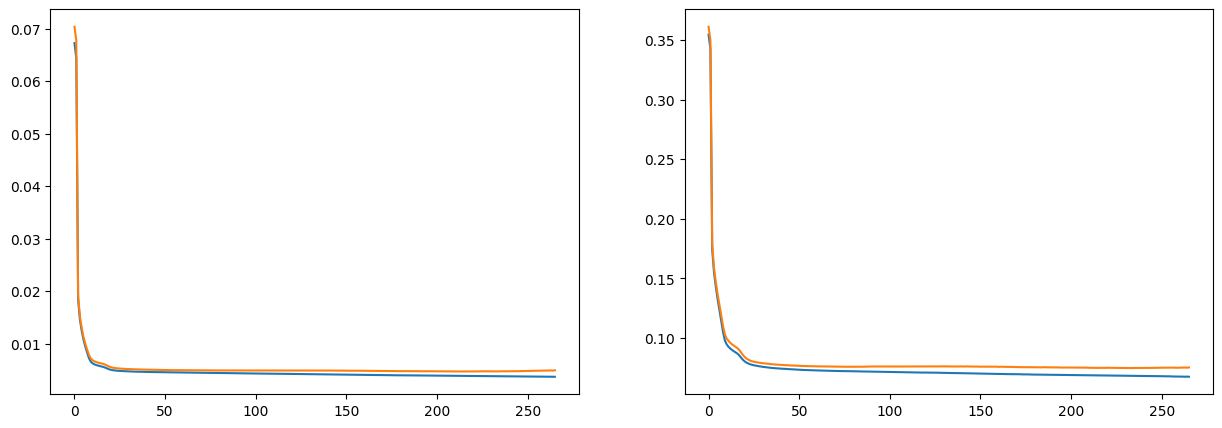

In [7]:
from src.regularizers import L1, L2

reg = 1e-7
model = Network(9, L2(reg))
model.add_layer(16, ReLU())
model.add_layer(8, ReLU())
model.add_layer(2, Sigmoid())

stats = model.train(
    eta=10e-3, 
    nesterov=0.9, 
    train=(x_train, y_train), 
    validation=(x_val, y_val), 
    metric=MeanEuclideanError(), 
    loss=MeanSquaredError(),
    epochs=1000,
    callbacks=[EarlyStopping(50)]
)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(stats['train_loss'], ax=axs[0])
sns.lineplot(stats['val_loss'], ax=axs[0])
sns.lineplot(stats['train_acc'], ax=axs[1])
sns.lineplot(stats['val_acc'], ax=axs[1])

y_pred = model.multiple_outputs(x_val)

y_pred_new = scaler.inverse_transform(y_pred.reshape((y_pred.shape[0], y_pred.shape[1]))).reshape(y_pred.shape)
y_val_new = scaler.inverse_transform(y_val.reshape((y_val.shape[0], y_val.shape[1]))).reshape(y_val.shape)

metric = MeanEuclideanError()
print("MEE (real scale):", metric(y_pred_new, y_val_new))

#### increase regularization strength

Training:  22%|██▏       | 216/1000[, loss=0.00403, val_loss=0.00489, val_acc=0.0753]

Early stopping
MEE (real scale): 1.4977055617180643


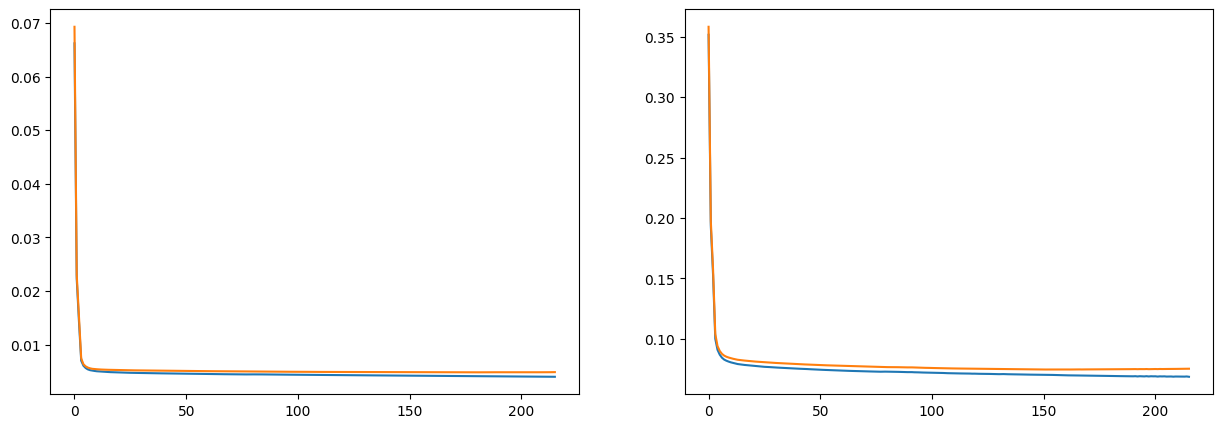

In [10]:
from src.regularizers import L1, L2

reg = 1e-6
model = Network(9, L2(reg))
model.add_layer(16, ReLU())
model.add_layer(16, ReLU())
model.add_layer(2, Sigmoid())

stats = model.train(
    eta=10e-3, 
    nesterov=0.9, 
    train=(x_train, y_train), 
    validation=(x_val, y_val), 
    metric=MeanEuclideanError(), 
    loss=MeanSquaredError(),
    epochs=1000,
    callbacks=[EarlyStopping(50)]
)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(stats['train_loss'], ax=axs[0])
sns.lineplot(stats['val_loss'], ax=axs[0])
sns.lineplot(stats['train_acc'], ax=axs[1])
sns.lineplot(stats['val_acc'], ax=axs[1])

y_pred = model.multiple_outputs(x_val)

y_pred_new = scaler.inverse_transform(y_pred.reshape((y_pred.shape[0], y_pred.shape[1]))).reshape(y_pred.shape)
y_val_new = scaler.inverse_transform(y_val.reshape((y_val.shape[0], y_val.shape[1]))).reshape(y_val.shape)

metric = MeanEuclideanError()
print("MEE (real scale):", metric(y_pred_new, y_val_new))

#### 32-16

Training:  65%|██████▍   | 647/1000[, loss=0.00397, val_loss=0.00481, val_acc=0.0758]

Early stopping
MEE (real scale): 1.5178914825590388


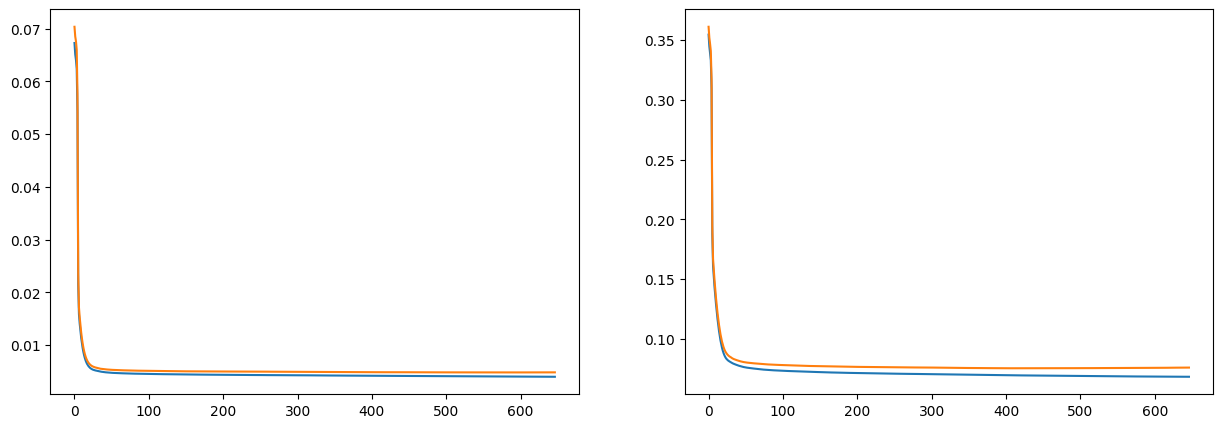

In [15]:
from src.regularizers import L1, L2

reg = 1e-6
model = Network(9, L2(reg))
model.add_layer(32, ReLU())
model.add_layer(16, ReLU())
model.add_layer(2, Sigmoid())

stats = model.train(
    eta=10e-3, 
    nesterov=0.6, 
    train=(x_train, y_train), 
    validation=(x_val, y_val), 
    metric=MeanEuclideanError(), 
    loss=MeanSquaredError(),
    epochs=1000,
    callbacks=[EarlyStopping(50)]
)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(stats['train_loss'], ax=axs[0])
sns.lineplot(stats['val_loss'], ax=axs[0])
sns.lineplot(stats['train_acc'], ax=axs[1])
sns.lineplot(stats['val_acc'], ax=axs[1])

y_pred = model.multiple_outputs(x_val)

y_pred_new = scaler.inverse_transform(y_pred.reshape((y_pred.shape[0], y_pred.shape[1]))).reshape(y_pred.shape)
y_val_new = scaler.inverse_transform(y_val.reshape((y_val.shape[0], y_val.shape[1]))).reshape(y_val.shape)

metric = MeanEuclideanError()
print("MEE (real scale):", metric(y_pred_new, y_val_new))

### overfitting a bit, try improving 16-16 with 24-16

Training:  29%|██▉       | 291/1000[, loss=0.00362, val_loss=0.00476, val_acc=0.074] 

Early stopping
MEE (real scale): 1.480950994314767


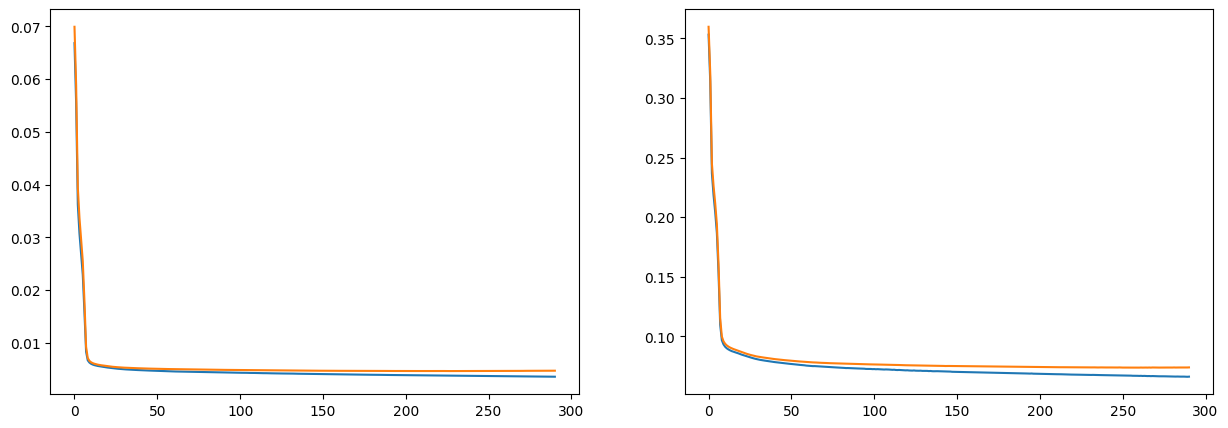

In [2]:
from src.regularizers import L1, L2

reg = 1e-6
model = Network(9, L2(reg))
model.add_layer(24, ReLU())
model.add_layer(16, ReLU())
model.add_layer(2, Sigmoid())

stats = model.train(
    eta=10e-3, 
    nesterov=0.8, 
    train=(x_train, y_train), 
    validation=(x_val, y_val), 
    metric=MeanEuclideanError(), 
    loss=MeanSquaredError(),
    epochs=1000,
    callbacks=[EarlyStopping(50)]
)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(stats['train_loss'], ax=axs[0])
sns.lineplot(stats['val_loss'], ax=axs[0])
sns.lineplot(stats['train_acc'], ax=axs[1])
sns.lineplot(stats['val_acc'], ax=axs[1])

y_pred = model.multiple_outputs(x_val)

y_pred_new = scaler.inverse_transform(y_pred.reshape((y_pred.shape[0], y_pred.shape[1]))).reshape(y_pred.shape)
y_val_new = scaler.inverse_transform(y_val.reshape((y_val.shape[0], y_val.shape[1]))).reshape(y_val.shape)

metric = MeanEuclideanError()
print("MEE (real scale):", metric(y_pred_new, y_val_new))

#### Trying 16-24

Training:  56%|█████▌    | 558/1000[, loss=0.00362, val_loss=0.0045, val_acc=0.0732] 

Early stopping
MEE (real scale): 1.4669360801455378


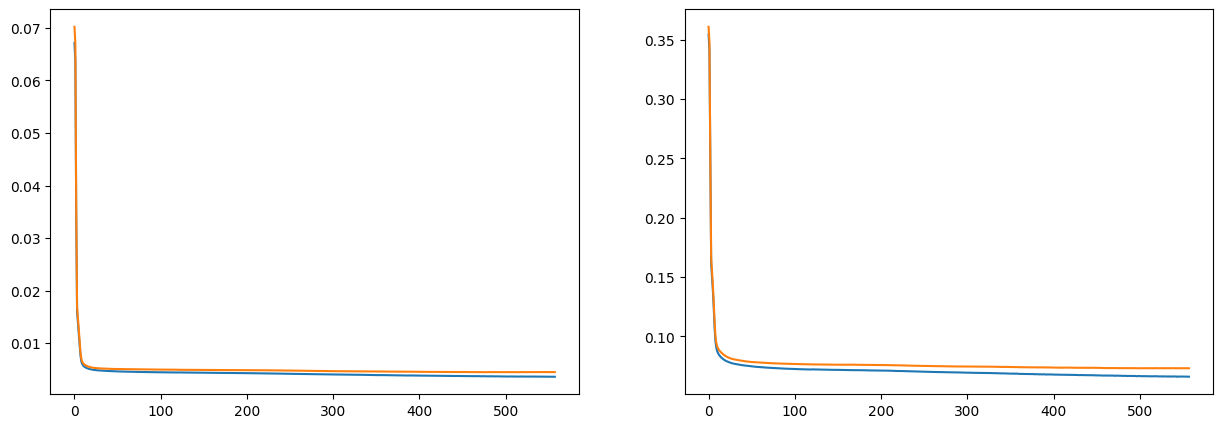

In [2]:
from src.regularizers import L1, L2

reg = 1e-6
model = Network(9, L2(reg))
model.add_layer(16, ReLU())
model.add_layer(24, ReLU())
model.add_layer(2, Sigmoid())

stats = model.train(
    eta=10e-3, 
    nesterov=0.8, 
    train=(x_train, y_train), 
    validation=(x_val, y_val), 
    metric=MeanEuclideanError(), 
    loss=MeanSquaredError(),
    epochs=1000,
    callbacks=[EarlyStopping(50)]
)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(stats['train_loss'], ax=axs[0])
sns.lineplot(stats['val_loss'], ax=axs[0])
sns.lineplot(stats['train_acc'], ax=axs[1])
sns.lineplot(stats['val_acc'], ax=axs[1])

y_pred = model.multiple_outputs(x_val)

y_pred_new = scaler.inverse_transform(y_pred.reshape((y_pred.shape[0], y_pred.shape[1]))).reshape(y_pred.shape)
y_val_new = scaler.inverse_transform(y_val.reshape((y_val.shape[0], y_val.shape[1]))).reshape(y_val.shape)

metric = MeanEuclideanError()
print("MEE (real scale):", metric(y_pred_new, y_val_new))

#### Try 24-24

Training:  66%|██████▌   | 657/1000[, loss=0.00358, val_loss=0.0046, val_acc=0.0737] 

Early stopping
MEE (real scale): 1.4756325026757278


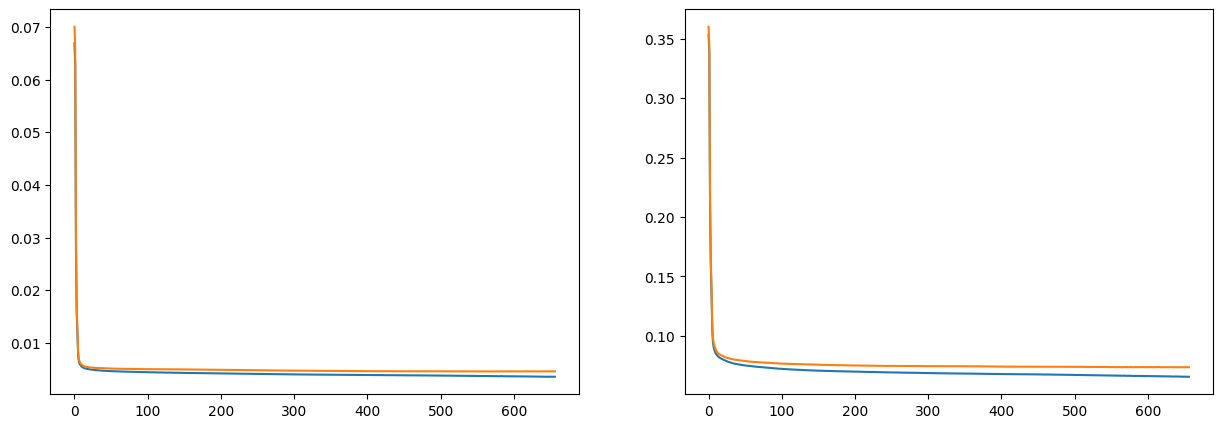

In [4]:
from src.regularizers import L1, L2

reg = 1e-6
model = Network(9, L2(reg))
model.add_layer(24, ReLU())
model.add_layer(24, ReLU())
model.add_layer(2, Sigmoid())

stats = model.train(
    eta=10e-3, 
    nesterov=0.8, 
    train=(x_train, y_train), 
    validation=(x_val, y_val), 
    metric=MeanEuclideanError(), 
    loss=MeanSquaredError(),
    epochs=1000,
    callbacks=[EarlyStopping(50)]
)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(stats['train_loss'], ax=axs[0])
sns.lineplot(stats['val_loss'], ax=axs[0])
sns.lineplot(stats['train_acc'], ax=axs[1])
sns.lineplot(stats['val_acc'], ax=axs[1])

y_pred = model.multiple_outputs(x_val)

y_pred_new = scaler.inverse_transform(y_pred.reshape((y_pred.shape[0], y_pred.shape[1]))).reshape(y_pred.shape)
y_val_new = scaler.inverse_transform(y_val.reshape((y_val.shape[0], y_val.shape[1]))).reshape(y_val.shape)

metric = MeanEuclideanError()
print("MEE (real scale):", metric(y_pred_new, y_val_new))

# GridSearch

### Starting with 16-24

In [2]:
from src.search import grid_search_cv
from src.regularizers import L1, L2
X, y, scaler = load_cup(validation=False, scale_outputs=True)
y_train.shape

(895, 2, 1)

In [3]:
model = Network(9)
model.add_layer(16, ReLU())
model.add_layer(24, ReLU())
model.add_layer(2, Sigmoid())

gs_results = grid_search_cv(
    model, 
    x=X, 
    y=y, 
    n_folds=3,
    metric=MeanEuclideanError(), 
    loss=MeanSquaredError(), 
    eta=[1e-3, 1e-2,],
    nesterov=[0.5,],
    reg_type=[L2, L1],
    reg_val=[1e-5],
    epochs=2,
    scaler=scaler
)

eta= 0.001 nesterov= 0.5 reg  <class 'src.regularizers.L2'> lambda = 1e-05
eta= 0.001 nesterov= 0.5 reg  <class 'src.regularizers.L1'> lambda = 1e-05
eta= 0.01 nesterov= 0.5 reg  <class 'src.regularizers.L2'> lambda = 1e-05
eta= 0.01 nesterov= 0.5 reg  <class 'src.regularizers.L1'> lambda = 1e-05
Early stopping
Early stopping
Early stopping
Early stopping
kv pid:  1
kv pid:  0
kv pid:  2
kv pid:  3
kv pid: kv pid:  1
 0
kv pid:  2
kv pid:  3
kv pid:  0
kv pid:  2
kv pid:  1
kv pid:  3


In [4]:
gs_results.values()

[{'accuracies': 7.952948607585341,
  'losses': 0.0738227115468953,
  'val_losses': 33.30081966278717},
 {'accuracies': 7.839457082083004,
  'losses': 0.07217024200841739,
  'val_losses': 32.6368012328606},
 {'accuracies': 7.944564011771611,
  'losses': 0.07366906163200443,
  'val_losses': 33.26871950599778},
 {'accuracies': 7.850039200054819,
  'losses': 0.07234067549924693,
  'val_losses': 32.705045761671755}]